In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os 
from pyod.models.iforest import IForest
import numpy as np
from sklearn.metrics import classification_report
from pyod.models.hbos import HBOS
from pyod.models.knn import KNN
from pyod.models.lscp import LSCP

from sklearn.metrics import accuracy_score
from pyod.models.pca import PCA
from pyod.models.lof import LOF
from pyod.models.mcd import MCD
import warnings
from pyod.utils.data import evaluate_print
from sklearn.preprocessing import StandardScaler

from scipy.stats import ConstantInputWarning

warnings.simplefilter("ignore", ConstantInputWarning)
warnings.filterwarnings("ignore", category=UserWarning, message="Local min features equals local max features; use all features instead.")
warnings.filterwarnings("ignore", category=UserWarning, message="Local min features smaller than 1, increasing to 1.0")
warnings.filterwarnings("ignore", category=UserWarning, message="The number of histogram bins is greater than the number of classifiers, reducing n_bins to n_clf.")


In [2]:
df=pd.read_csv("/Users/saikarthik/Desktop/Nexus-S1 Deakin /dataset/cleaned.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'timestamp', 'value'], dtype='object')

In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)


In [5]:
df.columns

Index(['timestamp', 'value'], dtype='object')

In [6]:
scaler = StandardScaler()
X = df[['value']].values
X_scaled = scaler.fit_transform(X)
X=X_scaled

# Essembled Based 

## LSCP

In [7]:
detectors = [
    KNN(),
    IForest(),
    LOF()
]


In [8]:
clf_lscp = LSCP(detectors)  


In [9]:
clf_lscp.fit(X)


LSCP(contamination=0.1,
   detector_list=[KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0), IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0), LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=20, novelty=True, p=2)],
   local_max_features=1.0, local_region_size=30, n_bins=3,
   random_state=RandomState(MT19937) at 0x10C39CC40)

In [10]:
y_pred_lscp= clf_lscp.labels_  
y_scores_lscp = clf_lscp.decision_scores_ 

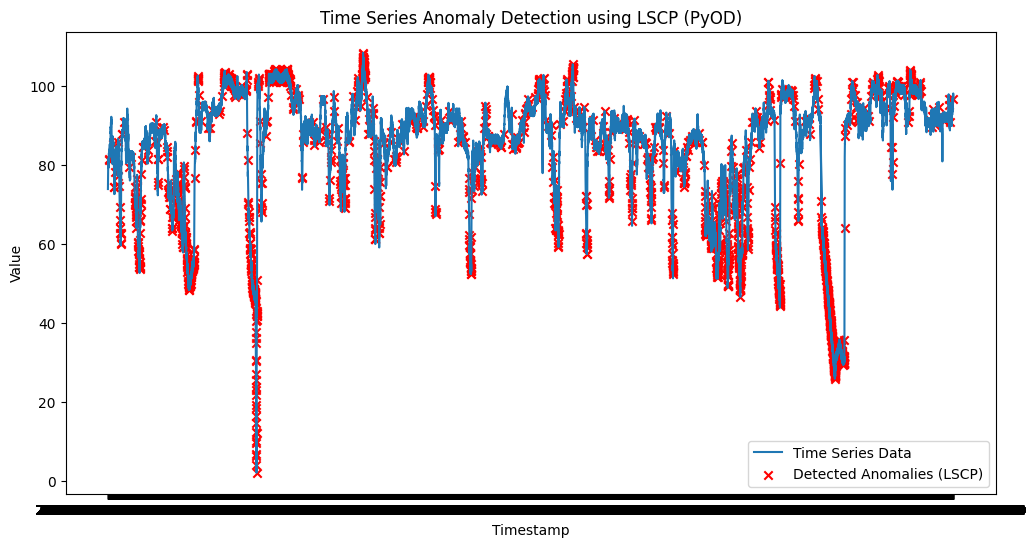

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['value'], label='Time Series Data')

# Plot detected anomalies
plt.scatter(df['timestamp'][y_pred_lscp == 1], df['value'][y_pred_lscp == 1], 
            color='red', marker='x', label='Detected Anomalies (LSCP)')

plt.title('Time Series Anomaly Detection using LSCP (PyOD)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

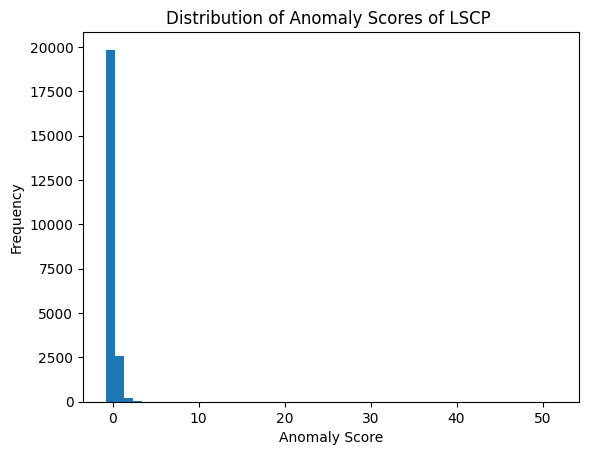

In [12]:
plt.hist(y_scores_lscp, bins=50)
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Distribution of Anomaly Scores of LSCP ')
plt.show()

## Isolation Forest 

In [13]:
clf = IForest(contamination=0.1, random_state=42)

In [14]:
clf.fit(X)


IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=42,
    verbose=0)

In [15]:
y_pred_if = clf.predict(X) 

In [16]:
y_scores_if= clf.decision_function(X)

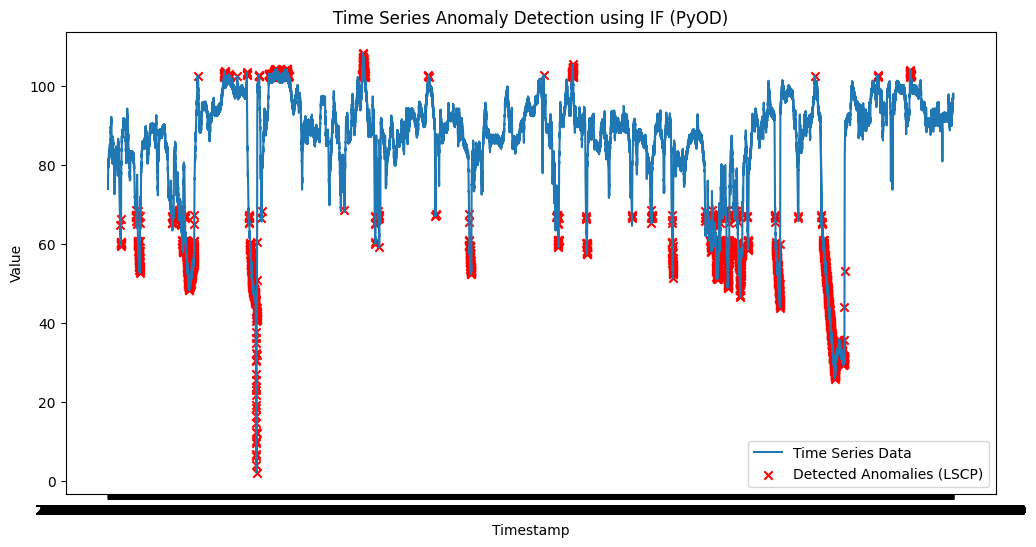

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['value'], label='Time Series Data')

plt.scatter(df['timestamp'][y_pred_if == 1], df['value'][y_pred_if == 1], 
            color='red', marker='x', label='Detected Anomalies (LSCP)')

plt.title('Time Series Anomaly Detection using IF (PyOD)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

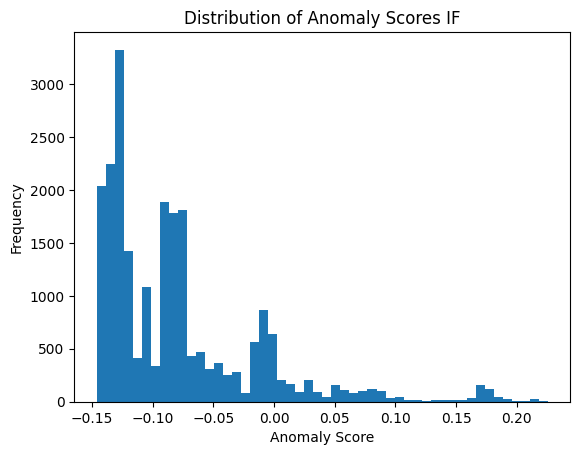

In [18]:
plt.hist(y_scores_if, bins=50)
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Distribution of Anomaly Scores IF')
plt.show()

# Proximity Based 

# LOF


In [19]:
clf_lof = LOF()
clf_lof.fit(X)

LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=20, novelty=True, p=2)

In [20]:
y_predict_lof = clf_lof.predict(X)

In [21]:
y_scores_lof=clf_lof.decision_function(X)

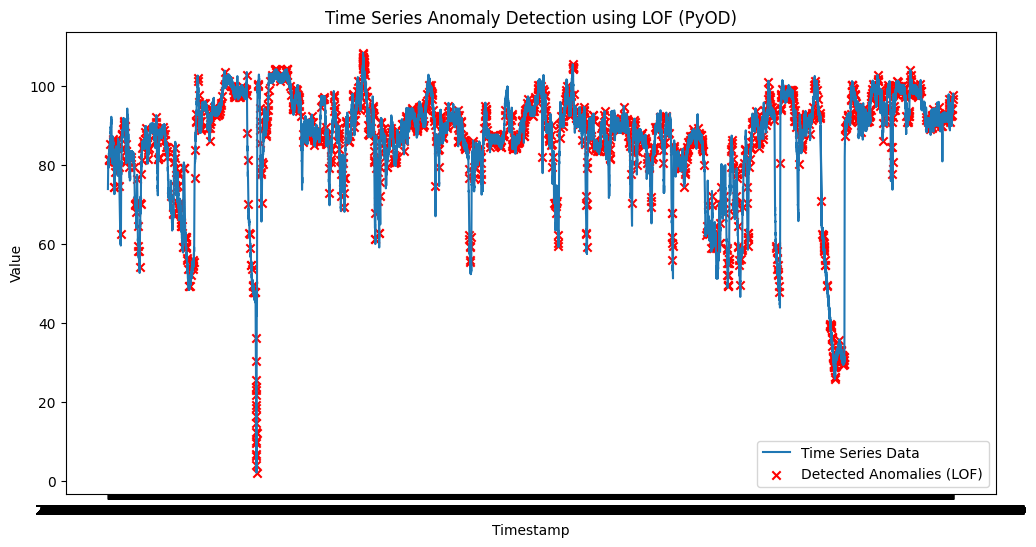

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['value'], label='Time Series Data')

# Plot detected anomalies
plt.scatter(df['timestamp'][y_predict_lof == 1], df['value'][y_predict_lof == 1], 
            color='red', marker='x', label='Detected Anomalies (LOF)')

plt.title('Time Series Anomaly Detection using LOF (PyOD)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

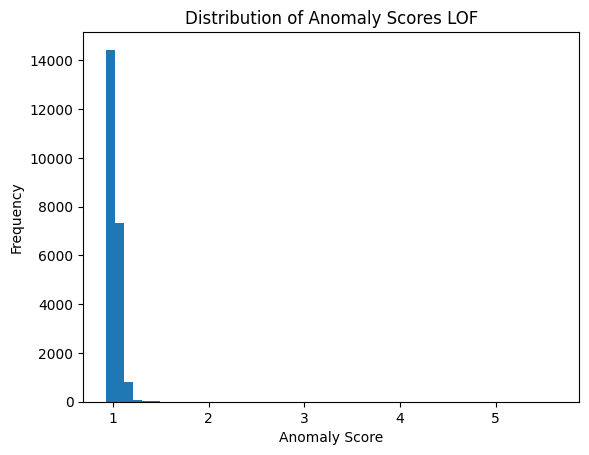

In [23]:
plt.hist(y_scores_lof, bins=50)
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Distribution of Anomaly Scores LOF')
plt.show()

## HBOS

In [24]:
clf_hbos = HBOS()
clf_hbos.fit(X)

HBOS(alpha=0.1, contamination=0.1, n_bins=10, tol=0.5)

In [25]:
y_predict_hbos = clf_hbos.predict(X)

In [26]:
y_scores_hbos=clf_hbos.decision_function(X)

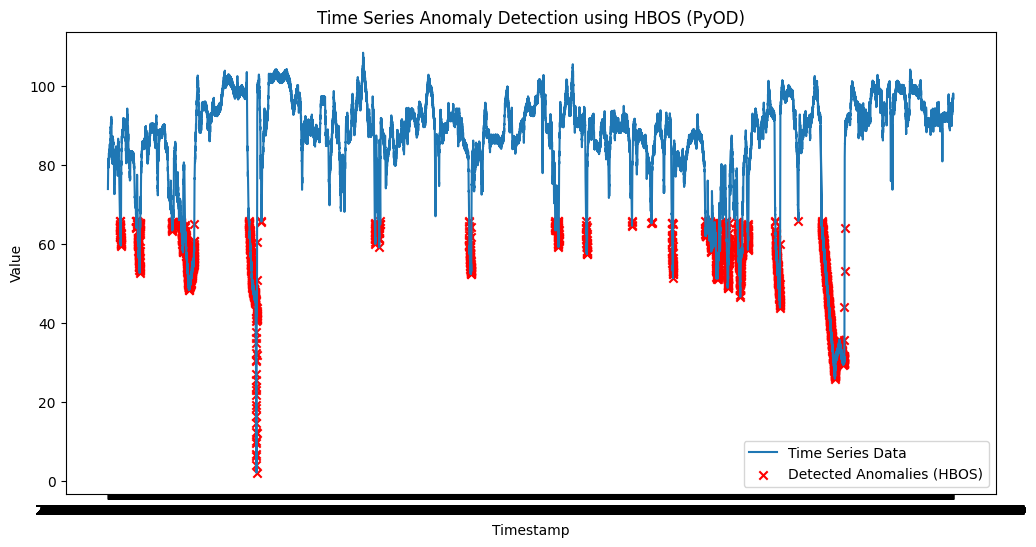

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['value'], label='Time Series Data')

# Plot detected anomalies
plt.scatter(df['timestamp'][y_predict_hbos == 1], df['value'][y_predict_hbos == 1], 
            color='red', marker='x', label='Detected Anomalies (HBOS)')

plt.title('Time Series Anomaly Detection using HBOS (PyOD)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

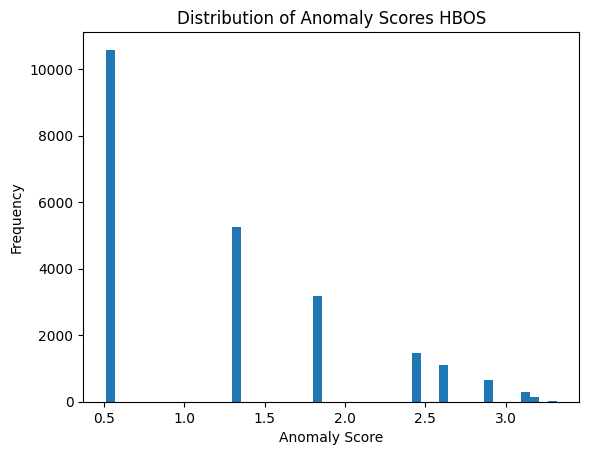

In [28]:
plt.hist(y_scores_hbos, bins=50)
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Distribution of Anomaly Scores HBOS')
plt.show()

## KNN 

In [29]:
clf_knn = KNN()
clf_knn.fit(X)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [37]:
y_predict_knn = clf_knn.predict(X)
y_scores_knn = clf_knn.decision_function(X)

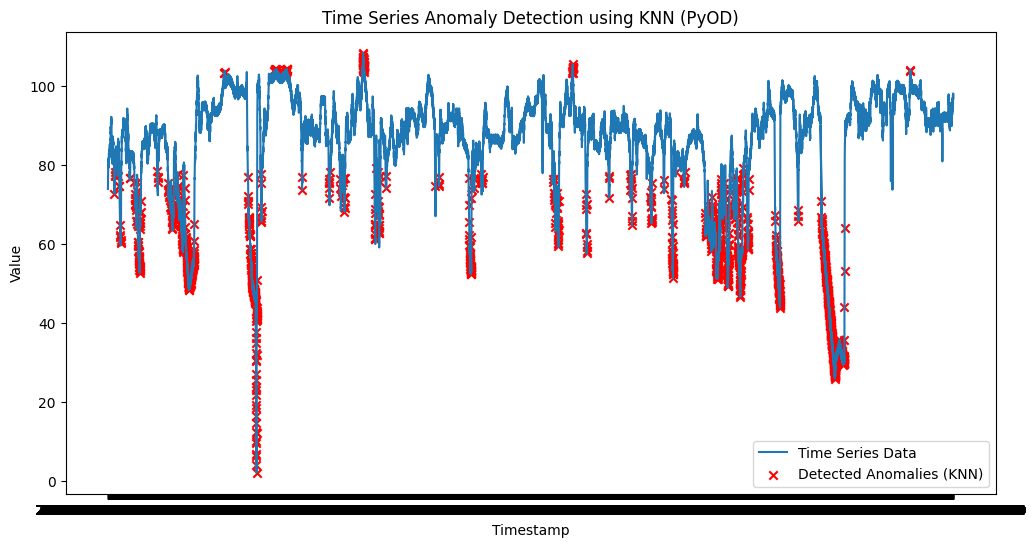

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['value'], label='Time Series Data')

# Plot detected anomalies
plt.scatter(df['timestamp'][y_predict_knn == 1], df['value'][y_predict_knn== 1], 
            color='red', marker='x', label='Detected Anomalies (KNN)')

plt.title('Time Series Anomaly Detection using KNN (PyOD)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

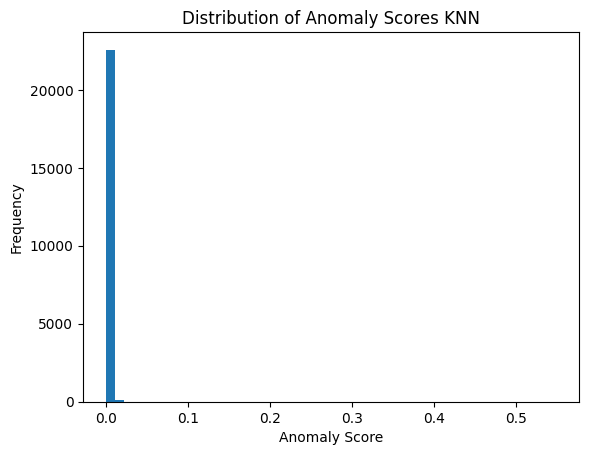

In [32]:
plt.hist(y_scores_knn, bins=50)
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Distribution of Anomaly Scores KNN')
plt.show()

# Linear Model

## PCA 

In [33]:
clf_pca = PCA(n_components=1, contamination=0.1)
clf_pca.fit(X_scaled)


PCA(contamination=0.1, copy=True, iterated_power='auto', n_components=1,
  n_selected_components=None, random_state=None, standardization=True,
  svd_solver='auto', tol=0.0, weighted=True, whiten=False)

In [34]:
y_predict_pca = clf_pca.predict(X_scaled)
y_scores_pca = clf_pca.decision_function(X_scaled)

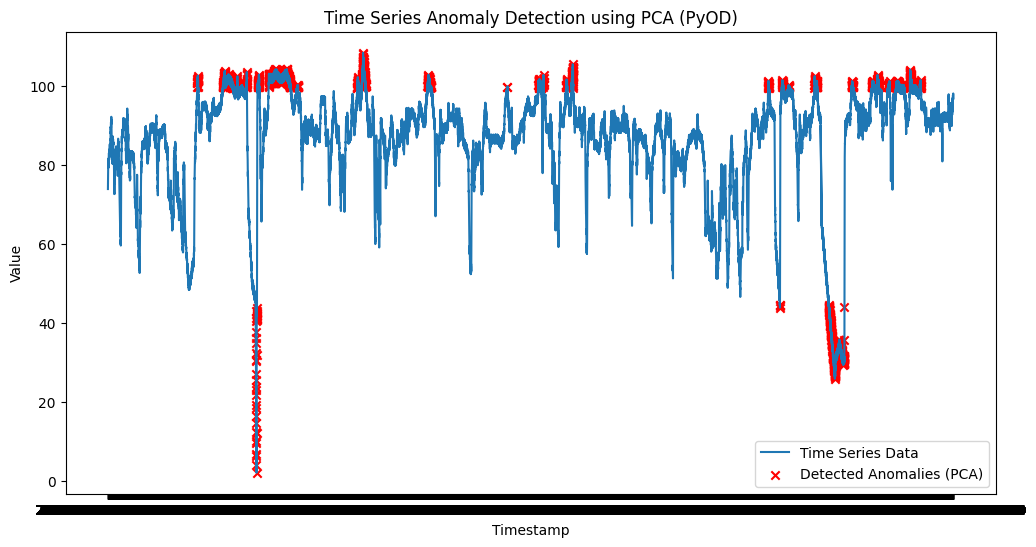

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['value'], label='Time Series Data')

# Plot detected anomalies
plt.scatter(df['timestamp'][y_predict_pca == 1], df['value'][y_predict_pca == 1], 
            color='red', marker='x', label='Detected Anomalies (PCA)')

plt.title('Time Series Anomaly Detection using PCA (PyOD)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

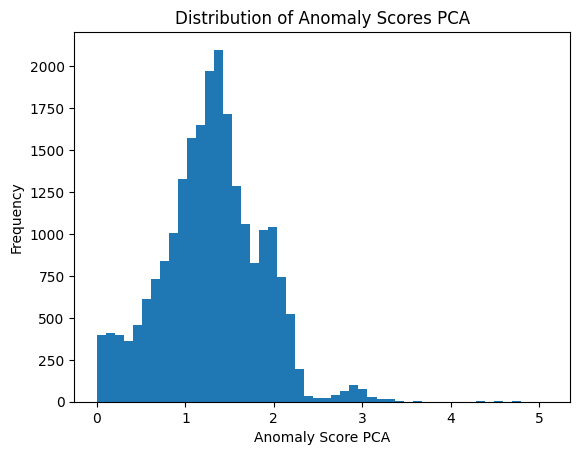

In [36]:
plt.hist(y_scores_pca, bins=50)
plt.xlabel('Anomaly Score PCA')
plt.ylabel('Frequency')
plt.title('Distribution of Anomaly Scores PCA')
plt.show()

## MCD 

In [37]:
clf_mcd = MCD()
clf_mcd.fit(X)

MCD(assume_centered=False, contamination=0.1, random_state=None,
  store_precision=True, support_fraction=None)

In [38]:
y_predict_mcd = clf_mcd.predict(X) # type: ignore
y_scores_mcd = clf_mcd.decision_function(X) # type: ignore

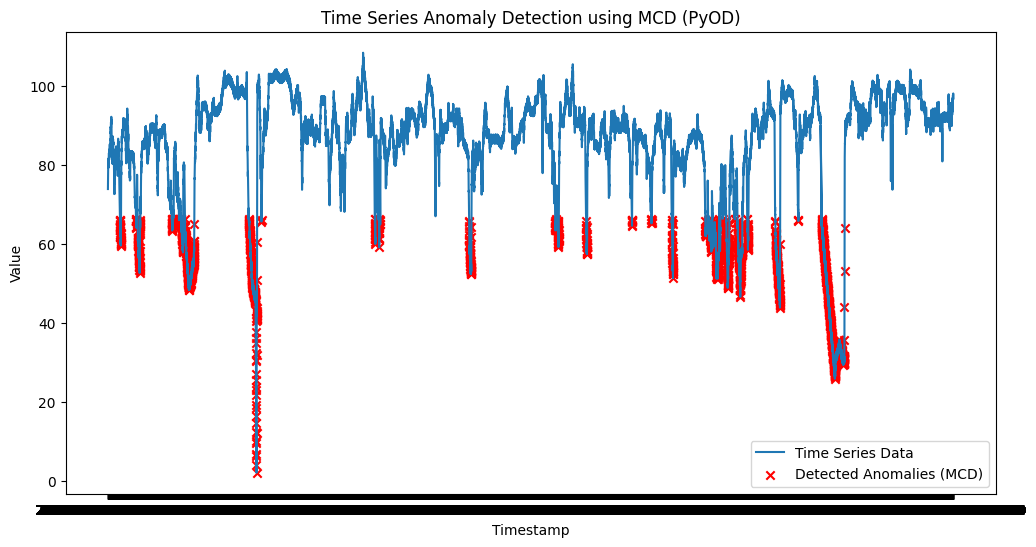

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['value'], label='Time Series Data')

plt.scatter(df['timestamp'][y_predict_mcd == 1], df['value'][y_predict_mcd== 1], 
            color='red', marker='x', label='Detected Anomalies (MCD)')

plt.title('Time Series Anomaly Detection using MCD (PyOD)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

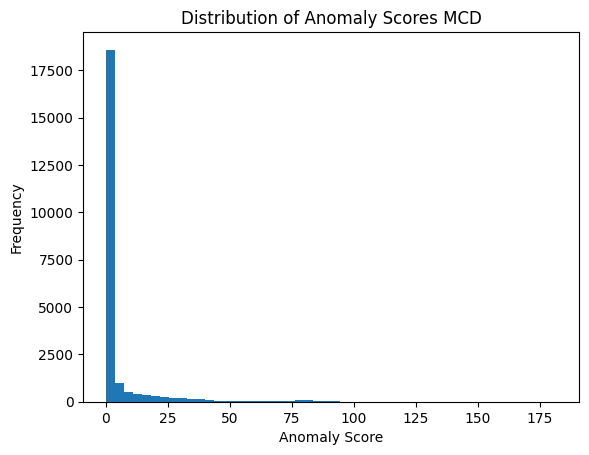

In [40]:
plt.hist(y_scores_mcd, bins=50)
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Distribution of Anomaly Scores MCD')
plt.show()